In [ ]:
## Importar librerias 

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

In [ ]:
print(df.describe()) ## (!) campaña tomada como entero

In [ ]:
df = df.astype({'CAMPAÑA': str})

In [ ]:
print(df.info())

In [ ]:
print(df.isna().sum())

## Preparacion de los datos 

Se busca analizar las variables y encontrar corelaciones para armar el modelo

*La suma de los pedidos por grupo representa el 30% de las ventas totales

In [ ]:
sns.set(rc={"figure.figsize":(28, 8)}) 

In [ ]:
## Se graficaron los pedidos totales para los grupos del 1 al 10
for i in range(1,11):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

#### Correlación Pearson:

In [ ]:
sns.heatmap(df.corr(method='pearson'), annot=True)

Solo se consideraron las variables con un coeficiente de corelacion mayor a 0.3 (corelacion moderada). Por ende, las Xn para el modelo1 se consideraron como:

- Grupo 1 (corr = 0.53)
- Grupo 2 (corr = 0.45)
- Grupo 3 (corr = 0.31)

In [ ]:
## Se analizó los pedidos totales en funcion a cada campaña 

sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

---

In [ ]:
## Se analizaron los pedidos totales por grupo uno a uno para ver la distribucion de los datos 

sns.scatterplot(data=df, x='GRUPO_1', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.53)

In [ ]:
sns.scatterplot(data=df, x='GRUPO_2', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.45)

In [ ]:
sns.scatterplot(data=df, x='GRUPO_3', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok

In [ ]:
sns.scatterplot(data=df, x='GRUPO_4', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_5', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_6', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_7', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok // corr = 0.31

In [ ]:
sns.scatterplot(data=df, x='GRUPO_8', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_9', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_10', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no // corr = 0.28

---

## Modelamiento de los datos


### Regresion Lineal:

Y = Pedidos totales

Xn = Grupo1 , Grupo2, Grupo3 

Outcome: predecir los pedidos totales, en función a los pedidos de cada grupo n. 

In [ ]:
for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

In [ ]:
## Se aplica un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion
X = df.iloc[:,1:4]
X
y =np.array(df['PEDIDOS_TOTALES'])
X_train, X_test, y_train,y_test = train_test_split(X,y)

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
coef = lin.coef_
print(coef)

In [ ]:
## Ecuacion de la recta ## y = mx1x1 + ... m10x10 + b 

ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)

ecuacion.to_csv('coeficientes.csv')

In [ ]:
g1 = int(input("Ingrese las ventas del Grupo 1: "))
g2 = int(input("Ingrese las ventas del Grupo 2: "))
g3 = int(input("Ingrese las ventas del Grupo 3: "))

ecuacion = coef[0]*g1 + coef[1]*g2 + coef[2]*g3 + lin.intercept_
print(ecuacion)

### Promedio Móvil:

Y = Pedidos totales

t = Campaña (201901 - 202009)


Outcome: predecir las ventas futuras en funcion a las ventas de campañas pasadas. 

In [ ]:
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

In [ ]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

In [ ]:
# años = []
# dias = [] ## tomamos el numero de campaña como dia del mes. 

# for i in df["CAMPAÑA"]:
#     años.append((i[0:4]))
#     dias.append(i[4:6])

# print("AÑOS ... ", años)
# print("\n")
# print("DIAS ... " , dias)

In [ ]:
# años = pd.DataFrame(años) + "01" ## para propositos del analisis se asume que todas las campañas se realizaron en distintos dias de enero 
# dias = pd.DataFrame(dias)
# años[0]

In [ ]:
# df["FECHA"] = años[0].str.cat(dias[0].astype(str))

In [ ]:
df.rename({"CAMPAÑA" : "FECHA"}, axis=1,inplace=True)
df

In [ ]:
##df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df.set_index("FECHA")
df

In [ ]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

<AxesSubplot:xlabel='FECHA'>

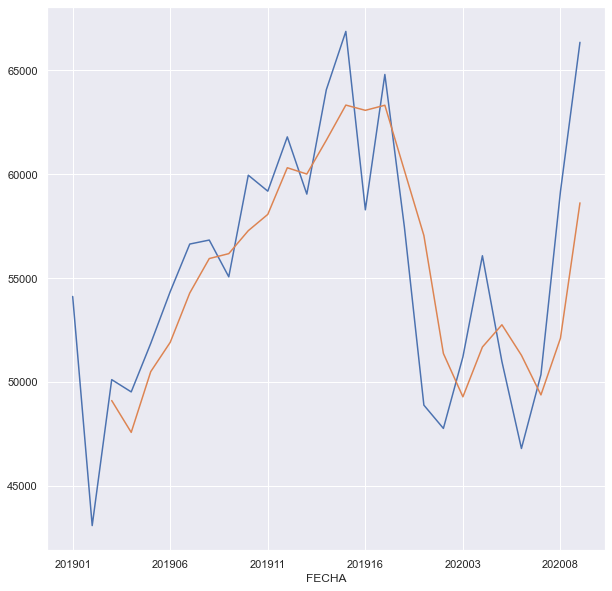

In [607]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))
df['PEDIDOS_TOTALES'].rolling(window=3).mean().plot()

In [610]:
df['PROMEDIO_MOVIL'] = df['PEDIDOS_TOTALES'].rolling(window=3).mean()

In [ ]:
df

In [615]:
pedidos_siguiente_campaña = df['PROMEDIO_MOVIL'].sum() / df['PROMEDIO_MOVIL'].count() ## Pronostico de los pedidos para la campaña n+1
pedidos_siguiente_campaña

55445.44

### Suavizacion Exponencial

Mediciones: 28 (cantidad de datos disponibles)

Y = Pedidos totales

t = Campaña (201901 - 202009) 

Outcome: predecir 
predecir las ventas futuras en funcion a las ventas de campañas pasadas. 

In [ ]:
df.plot()

In [ ]:
test = df.iloc[:,[10]]
test

In [ ]:
train = df.iloc[14:,[10]]
train

In [ ]:
train.plot()
test.plot()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model1 = ExponentialSmoothing(train['PEDIDOS_TOTALES'],trend = 'add', seasonal = 'add', seasonal_periods = 2).fit()

In [ ]:
model2 = ExponentialSmoothing(train['PEDIDOS_TOTALES'],trend = 'mul', seasonal = 'mul', seasonal_periods = 2).fit()

In [ ]:
test.plot()
model1.forecast(15).plot()
model2.forecast(15).plot()